# Task - Frozen Lake

- Brando Reyes
- Juan Pablo Solis
- Carlos Valladares

### **Enlace del Repositorio:**
https://github.com/vgcarlol/Corto1_IA

### **Enlace Video Demostracion:**
https://youtu.be/ZRxwE5320gg

Librerías a utilizar:

In [22]:
import numpy as np
import gymnasium as gym
import random
import os
import matplotlib.pyplot as plt

In [23]:
q_table_file = "q_table.npy"

if os.path.exists(q_table_file):
    os.remove(q_table_file)
    print("Archivo de tabla Q eliminado para evitar confusiones.")
else:
    print("No se encontró un archivo de tabla Q existente.")

Archivo de tabla Q eliminado para evitar confusiones.


Creación del entorno de FrozekLake con slippery=True (Hielo resbaladizo)

In [24]:
random_seed = random.randint(0, 10000)
np.random.seed(random_seed)

env = gym.make("FrozenLake-v1", desc=None, map_name="4x4", is_slippery=True, render_mode=None)
env.reset(seed=random_seed)


(0, {'prob': 1})

Parámetros del agente

In [25]:
learning_rate = 0.1  # Tasa de aprendizaje
gamma = 0.99  # Factor de descuento 
epsilon = 1.0  # Probabilidad inicial de exploración
epsilon_decay = 0.9995  # Factor de decaimiento de epsilon
epsilon_min = 0.05  
num_episodios = 15000  

In [26]:
tablaQ = np.zeros((env.observation_space.n, env.action_space.n))
print("Nueva tabla Q inicializada.")


Nueva tabla Q inicializada.


Función para elegir una acción con política epsilon-greedy

In [27]:
def elegir_accion(state, epsilon):
    if np.random.rand() < epsilon:
        return env.action_space.sample()  # Exploración
    else:
        return np.argmax(tablaQ[state, :])  # Explotación


Entrenamiento

In [28]:
success_rates = []  
avg_rewards = []  

for episode in range(num_episodios):
    estado, _ = env.reset()
    done = False
    total_reward = 0
    
    while not done:
        accion = elegir_accion(estado, epsilon)
        siguiente_estado, recompensa, done, _, _ = env.step(accion)

        
        if done:
            if recompensa == 1:
                recompensa = 10  
            else:
                recompensa = -1  

        
        tablaQ[estado, accion] = tablaQ[estado, accion] + learning_rate * (
            recompensa + gamma * np.max(tablaQ[siguiente_estado, :]) - tablaQ[estado, accion]
        )

        estado = siguiente_estado
        total_reward += recompensa

    
    epsilon = max(epsilon * epsilon_decay, epsilon_min)
    
    
    if episode % 1000 == 0:
        success_count = 0
        total_rewards = 0
        for _ in range(100):
            state, _ = env.reset()
            done = False
            episode_reward = 0
            
            while not done:
                action = np.argmax(tablaQ[state, :])  
                state, reward, done, _, _ = env.step(action)
                episode_reward += reward
            
            total_rewards += episode_reward
            if episode_reward > 0:
                success_count += 1
        
        success_rate = (success_count / 100) * 100
        avg_reward = total_rewards / 100
        success_rates.append(success_rate)
        avg_rewards.append(avg_reward)
        print(f"Episodio {episode} - Éxito: {success_rate:.2f}% - Epsilon: {epsilon:.3f}")


np.save(q_table_file, tablaQ)
print("Tabla Q guardada.")


Episodio 0 - Éxito: 0.00% - Epsilon: 1.000
Episodio 1000 - Éxito: 83.00% - Epsilon: 0.606
Episodio 2000 - Éxito: 85.00% - Epsilon: 0.368
Episodio 3000 - Éxito: 88.00% - Epsilon: 0.223
Episodio 4000 - Éxito: 69.00% - Epsilon: 0.135
Episodio 5000 - Éxito: 82.00% - Epsilon: 0.082
Episodio 6000 - Éxito: 87.00% - Epsilon: 0.050
Episodio 7000 - Éxito: 75.00% - Epsilon: 0.050
Episodio 8000 - Éxito: 85.00% - Epsilon: 0.050
Episodio 9000 - Éxito: 83.00% - Epsilon: 0.050
Episodio 10000 - Éxito: 83.00% - Epsilon: 0.050
Episodio 11000 - Éxito: 81.00% - Epsilon: 0.050
Episodio 12000 - Éxito: 86.00% - Epsilon: 0.050
Episodio 13000 - Éxito: 85.00% - Epsilon: 0.050
Episodio 14000 - Éxito: 83.00% - Epsilon: 0.050
Tabla Q guardada.


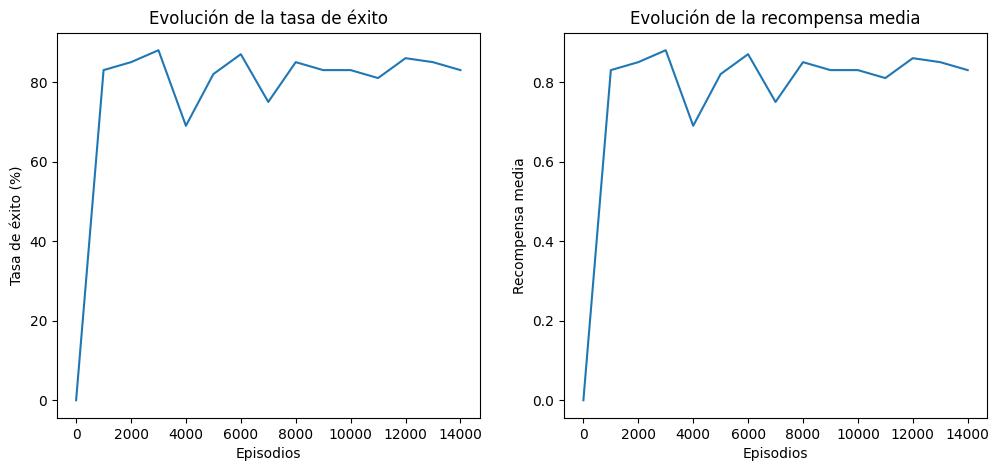

In [29]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(0, num_episodios, 1000), success_rates)
plt.xlabel("Episodios")
plt.ylabel("Tasa de éxito (%)")
plt.title("Evolución de la tasa de éxito")

plt.subplot(1, 2, 2)
plt.plot(range(0, num_episodios, 1000), avg_rewards)
plt.xlabel("Episodios")
plt.ylabel("Recompensa media")
plt.title("Evolución de la recompensa media")
plt.show()


Evaluación del agente

In [30]:
def evaluate_agent(num_tests=100):
    success_count = 0
    total_rewards = 0
    
    for _ in range(num_tests):
        state, _ = env.reset()
        done = False
        episode_reward = 0
        
        while not done:
            action = np.argmax(tablaQ[state, :])  
            state, reward, done, _, _ = env.step(action)
            episode_reward += reward
        
        total_rewards += episode_reward
        if episode_reward > 0:  
            success_count += 1
    
    success_rate = success_count / num_tests * 100
    avg_reward = total_rewards / num_tests
    
    print(f"Tasa de éxito final: {success_rate:.2f}%")
    print(f"Recompensa media final: {avg_reward:.2f}")


evaluate_agent()


Tasa de éxito final: 85.00%
Recompensa media final: 0.85


In [31]:
def play_agent():
    env_render = gym.make("FrozenLake-v1", desc=None, map_name="4x4", is_slippery=True, render_mode="human")
    state, _ = env_render.reset()
    done = False
    
    while not done:
        action = np.argmax(tablaQ[state, :])
        state, _, done, _, _ = env_render.step(action)
    
    env_render.close()

print("\nMostrando cómo juega el agente...")
play_agent()



Mostrando cómo juega el agente...
